In [2]:
import pandas as pd
 
# Data.tsv is stored locally in the
# same directory as of this python file
df_metadata = pd.read_csv('food-metadata.tsv',sep = '\t')
display(df_metadata)

,sample-id,rindtype,style,name,continent,country,region,longitude,latitude,ph,salt,moisture,animal_source,pasteurized
0,#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,numeric,numeric,categorical,categorical,categorical,categorical,categorical
1,11488.CSB279,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.95,0.044293775,33.33333333,cow,N
2,11488.CSB280,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.045997737,34.80519481,cow,N
3,11488.CSB281,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.54,0.068926154,31.33333333,cow,N
4,11488.CSB282,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.030862483,34.90566038,cow,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,11488.CSB980,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.02,0.134996023,28.20512821,cow,Y
351,11488.CSB981,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.09,0.102762839,25.76153177,cow,Y
352,11488.CSB984,natural,clothbound,Bandaged_Cheddar,North_America,USA,Wisconsin,-90.23096,42.573335,7.41,0.285081837,28.84012539,cow,Y
353,11488.CSB985,washed,alpine,Alpine_Renegade,North_America,USA,Wisconsin,-89.832345,43.017497,7.06,0.109716632,24.9661705,cow,N


In [3]:
df_metadata.set_index('sample-id', inplace = True)
display (df_metadata)


,rindtype,style,name,continent,country,region,longitude,latitude,ph,salt,moisture,animal_source,pasteurized
sample-id,,,,,,,,,,,,,
#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,numeric,numeric,categorical,categorical,categorical,categorical,categorical
11488.CSB279,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.95,0.044293775,33.33333333,cow,N
11488.CSB280,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.045997737,34.80519481,cow,N
11488.CSB281,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.54,0.068926154,31.33333333,cow,N
11488.CSB282,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.030862483,34.90566038,cow,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11488.CSB980,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.02,0.134996023,28.20512821,cow,Y
11488.CSB981,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.09,0.102762839,25.76153177,cow,Y
11488.CSB984,natural,clothbound,Bandaged_Cheddar,North_America,USA,Wisconsin,-90.23096,42.573335,7.41,0.285081837,28.84012539,cow,Y


In [4]:

print(df_metadata.dtypes)




rindtype         object
style            object
name             object
continent        object
country          object
region           object
longitude        object
latitude         object
ph               object
salt             object
moisture         object
animal_source    object
pasteurized      object
dtype: object


Text data type is known as Strings in Python, or Objects in Pandas. Strings can contain numbers and / or characters. For example, a string might be a word, a sentence, or several sentences. A Pandas object might also be a plot name like ‘plot1’. A string can also contain or consist of numbers. For instance, ‘1234’ could be stored as a string, as could ‘10.23’. However strings that contain numbers can not be used for mathematical operations! source (https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/, also includes code for change of data type)


**12.10.22 Milena**

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

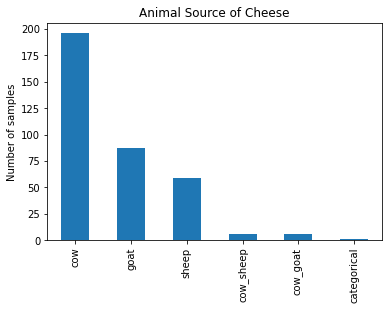

In [22]:
df_metadata['animal_source'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Animal Source of Cheese')
plt.show()

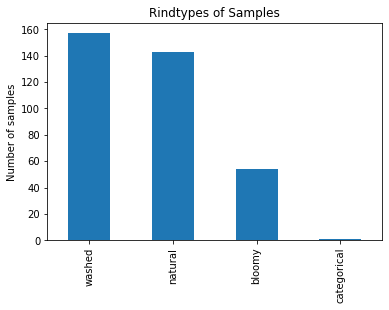

In [23]:
df_metadata['rindtype'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Rindtypes of Samples')
plt.show()